# Imports & File Load

In [1]:
import pandas as pd
import numpy as np
import pandas_profiling
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.rcParams['pdf.fonttype'] = 42
# import requests
# import json
import re
# import os
# import time
# from bs4 import BeautifulSoup
from collections import Counter
%matplotlib inline

In [2]:
df = pd.read_csv("sources/judges_careersCurrentFirst.csv")
df.head(3)

,nid,jid,Last Name,First Name,Middle Name,Suffix,Birth Month,Birth Day,Birth Year,Birth City,...,Degree (3),Degree Year (3),School (4),Degree (4),Degree Year (4),School (5),Degree (5),Degree Year (5),Professional Career,Other Nominations/Recess Appointments
0,1393126,3258,Scarburgh,George,Parker,,2.0,11.0,1807,Accomack County,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Private practice, Accomack County, Virginia, 1...",NaN
1,1393041,3241,Gilchrist,John,James,,2.0,16.0,1809,Medford,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Private practice, Charlestown, New Hampshire, ...",NaN
2,1393146,3262,Loring,Edward,Greely,,1.0,28.0,1802,Boston,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Private practice and master in chancery, Suffo...",NaN


# File Investigation

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3694 entries, 0 to 3693
Columns: 201 entries, nid to Other Nominations/Recess Appointments
dtypes: float64(56), int64(2), object(143)
memory usage: 3.6+ MB


In [4]:
original_size = df.memory_usage().sum()
original_size

3827024

In [5]:
# df.dtypes
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3694 entries, 0 to 3693
Data columns (total 201 columns):
nid                                      int64
jid                                      int64
Last Name                                object
First Name                               object
Middle Name                              object
Suffix                                   object
Birth Month                              float64
Birth Day                                float64
Birth Year                               object
Birth City                               object
Birth State                              object
Death Month                              float64
Death Day                                float64
Death Year                               float64
Death City                               object
Death State                              object
Gender                                   object
Race or Ethnicity                        object
Court Type (1)           

# Basic Clean
- make easy column headers
- remove the circa abbreviation everywhere 
- convert separated birth/death info to united field
- convert all string dates into datetime
- convert year-only dates into datetime
- convert repeated strings to categories

In [6]:
df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.replace('/', '_n_')
df.columns = df.columns.str.replace('\(|\)|,', '')
df.replace('ca. ','',regex=True,inplace=True)

In [7]:
df['Birth_Month'] = pd.to_numeric(df['Birth_Month'], errors='coerce').fillna(value=9).astype(int)
df['Birth_Day'] = pd.to_numeric(df['Birth_Day'], errors='coerce').fillna(value=30).astype(int)
df['Birth_Year'] = pd.to_numeric(df['Birth_Year'], errors='coerce').fillna(value=1677).astype(int)
df['Birth_Date'] = df.Birth_Year.map(str).astype(str).str.zfill(4) + '-' + df.Birth_Month.map(str).astype(str).str.zfill(2) + '-' + df.Birth_Day.map(str).astype(str).str.zfill(2)
df['Death_Month'] = pd.to_numeric(df['Death_Month'], errors='coerce').fillna(value=9).astype(int)
df['Death_Day'] = pd.to_numeric(df['Death_Day'], errors='coerce').fillna(value=30).astype(int)
df['Death_Year'] = pd.to_numeric(df['Death_Year'], errors='coerce').fillna(value=1677).astype(int)
df['Death_Date'] = df.Death_Year.map(str).astype(str).str.zfill(4) + '-' + df.Death_Month.map(str).astype(str).str.zfill(2) + '-' + df.Death_Day.map(str).astype(str).str.zfill(2)

In [8]:
df.Death_Date.head()

0    1879-12-21
1    1858-04-29
2    1890-06-19
3    1907-12-27
4    1905-04-10
Name: Death_Date, dtype: object

In [9]:
forceDT = [
    'Birth_Date','Death_Date',
    'Recess_Appointment_Date_1','Nomination_Date_1','Committee_Referral_Date_1','Hearing_Date_1','Committee_Action_Date_1','Confirmation_Date_1','Commission_Date_1','Service_as_Chief_Judge_Begin_1','Service_as_Chief_Judge_End_1','2nd_Service_as_Chief_Judge_Begin_1','2nd_Service_as_Chief_Judge_End_1','Senior_Status_Date_1','Termination_Date_1',
    'Recess_Appointment_Date_2','Nomination_Date_2','Committee_Referral_Date_2','Hearing_Date_2','Committee_Action_Date_2','Confirmation_Date_2','Commission_Date_2','Service_as_Chief_Judge_Begin_2','Service_as_Chief_Judge_End_2','2nd_Service_as_Chief_Judge_Begin_2','2nd_Service_as_Chief_Judge_End_2','Senior_Status_Date_2','Termination_Date_2',
    'Recess_Appointment_Date_3','Nomination_Date_3','Committee_Referral_Date_3','Hearing_Date_3','Committee_Action_Date_3','Confirmation_Date_3','Commission_Date_3','Service_as_Chief_Judge_Begin_3','Service_as_Chief_Judge_End_3','2nd_Service_as_Chief_Judge_Begin_3','2nd_Service_as_Chief_Judge_End_3','Senior_Status_Date_3','Termination_Date_3',
    'Recess_Appointment_Date_4','Nomination_Date_4','Committee_Referral_Date_4','Hearing_Date_4','Committee_Action_Date_4','Confirmation_Date_4','Commission_Date_4','Service_as_Chief_Judge_Begin_4','Service_as_Chief_Judge_End_4','2nd_Service_as_Chief_Judge_Begin_4','2nd_Service_as_Chief_Judge_End_4','Senior_Status_Date_4','Termination_Date_4',
    'Recess_Appointment_Date_5','Nomination_Date_5','Committee_Referral_Date_5','Hearing_Date_5','Committee_Action_Date_5','Confirmation_Date_5','Commission_Date_5','Service_as_Chief_Judge_Begin_5','Service_as_Chief_Judge_End_5','2nd_Service_as_Chief_Judge_Begin_5','2nd_Service_as_Chief_Judge_End_5','Senior_Status_Date_5','Termination_Date_5',
    'Recess_Appointment_Date_6','Nomination_Date_6','Committee_Referral_Date_6','Hearing_Date_6','Committee_Action_Date_6','Confirmation_Date_6','Commission_Date_6','Service_as_Chief_Judge_Begin_6','Service_as_Chief_Judge_End_6','2nd_Service_as_Chief_Judge_Begin_6','2nd_Service_as_Chief_Judge_End_6','Senior_Status_Date_6','Termination_Date_6'
]
df[forceDT] = df[forceDT].apply(pd.to_datetime)

In [10]:
df['Degree_Year_1'] = pd.to_datetime(df['Degree_Year_1'],format='%Y', errors='coerce')
df['Degree_Year_2'] = pd.to_datetime(df['Degree_Year_2'],format='%Y', errors='coerce')
df['Degree_Year_3'] = pd.to_datetime(df['Degree_Year_3'],format='%Y', errors='coerce')
df['Degree_Year_4'] = pd.to_datetime(df['Degree_Year_4'],format='%Y', errors='coerce')
df['Degree_Year_5'] = pd.to_datetime(df['Degree_Year_5'],format='%Y', errors='coerce')

In [11]:
df['Full_Name'] = df.First_Name + ' ' + df.Middle_Name + ' ' + df.Last_Name + ', ' + df.Suffix
df.Full_Name.replace(r'\s{2,4}',' ',regex=True,inplace=True)
df.Full_Name.replace(r', $','',regex=True,inplace=True)
df.Full_Name.head(30)

0          George Parker Scarburgh
1             John James Gilchrist
2             Edward Greely Loring
3     John Chandler Bancroft Davis
4                  Lawrence Weldon
5           George Wesley Atkinson
6                        James Hay
7            William Raymond Green
8             Joseph Warren Madden
9           Isaac Newton Blackford
10                    James Hughes
11             Charles Bowen Howry
12              George Eddy Downey
13              John McKenzie Moss
14      Benjamin Horsley Littleton
15            James Randall Durfee
16                    Joseph Casey
17            Charles Daniel Drake
18        William Adams Richardson
19             Charles Cooper Nott
20          Stanton Judkins Peelle
21          Edward Kernan Campbell
22           Fenton Whitlock Booth
23            Richard Smith Whaley
24                    David Wilmot
25                 Samuel Milligan
26                      John Davis
27           Nicholas John Sinnott
28          Thomas S

In [12]:
df.memory_usage().sum() / original_size * 100

118.14652847748015

In [13]:
# forceCat = [
#     'Gender','Race_or_Ethnicity','Birth_City','Birth_State','Death_City','Death_State',
#     'Court_Type_1','Court_Name_1','Appointment_Title_1','Appointing_President_1','Party_of_Appointing_President_1','Reappointing_President_1','Party_of_Reappointing_President_1','ABA_Rating_1','Judiciary_Committee_Action_1','Senate_Vote_Type_1','Termination_1',
#     'Court_Type_2','Court_Name_2','Appointment_Title_2','Appointing_President_2','Party_of_Appointing_President_2','Reappointing_President_2','Party_of_Reappointing_President_2','ABA_Rating_2','Judiciary_Committee_Action_2','Senate_Vote_Type_2','Termination_2',
#     'Court_Type_3','Court_Name_3','Appointment_Title_3','Appointing_President_3','Party_of_Appointing_President_3','Reappointing_President_3','Party_of_Reappointing_President_3','ABA_Rating_3','Judiciary_Committee_Action_3','Senate_Vote_Type_3','Termination_3',
#     'Court_Type_4','Court_Name_4','Appointment_Title_4','Appointing_President_4','Party_of_Appointing_President_4','Reappointing_President_4','Party_of_Reappointing_President_4','ABA_Rating_4','Judiciary_Committee_Action_4','Senate_Vote_Type_4','Termination_4',
#     'Court_Type_5','Court_Name_5','Appointment_Title_5','Appointing_President_5','Party_of_Appointing_President_5','Reappointing_President_5','Party_of_Reappointing_President_5','ABA_Rating_5','Judiciary_Committee_Action_5','Senate_Vote_Type_5','Termination_5',
#     'Court_Type_6','Court_Name_6','Appointment_Title_6','Appointing_President_6','Party_of_Appointing_President_6','Reappointing_President_6','Party_of_Reappointing_President_6','ABA_Rating_6','Judiciary_Committee_Action_6','Senate_Vote_Type_6','Termination_6',
#     'School_1','Degree_1','School_2','Degree_2','School_3','Degree_3','School_4','Degree_4','School_5','Degree_5'
# ]
# df[forceCat] = df[forceCat].astype('category')
# df.memory_usage().sum() / original_size * 100

In [14]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3694 entries, 0 to 3693
Data columns (total 204 columns):
nid                                        int64
jid                                        int64
Last_Name                                  object
First_Name                                 object
Middle_Name                                object
Suffix                                     object
Birth_Month                                int32
Birth_Day                                  int32
Birth_Year                                 int32
Birth_City                                 object
Birth_State                                object
Death_Month                                int32
Death_Day                                  int32
Death_Year                                 int32
Death_City                                 object
Death_State                                object
Gender                                     object
Race_or_Ethnicity                          object


# Join Key Tables

### Additional Info on Presidents

In [15]:
columns = ['Pres_Num','Pres_Name','Pres_State_Abbrev']
pres_df = pd.read_csv("sources/key_presidents.csv", usecols=columns)
df = df.merge(pres_df, left_on='Appointing_President_1', right_on='Pres_Name')
df = df.rename({'Pres_Num':'Appointing_President_Num_1', 'Pres_State_Abbrev':'Appointing_President_State_1'}, axis=1)
del df['Pres_Name']
df.head()

,nid,jid,Last_Name,First_Name,Middle_Name,Suffix,Birth_Month,Birth_Day,Birth_Year,Birth_City,...,School_5,Degree_5,Degree_Year_5,Professional_Career,Other_Nominations_n_Recess_Appointments,Birth_Date,Death_Date,Full_Name,Appointing_President_Num_1,Appointing_President_State_1
0,1393126,3258,Scarburgh,George,Parker,,2,11,1807,Accomack County,...,NaN,NaN,NaT,"Private practice, Accomack County, Virginia, 1...",NaN,1807-02-11,1879-12-21,George Parker Scarburgh,14,NH
1,1393041,3241,Gilchrist,John,James,,2,16,1809,Medford,...,NaN,NaN,NaT,"Private practice, Charlestown, New Hampshire, ...",NaN,1809-02-16,1858-04-29,John James Gilchrist,14,NH
2,1393006,3234,Blackford,Isaac,Newton,,11,6,1786,Bound Brook,...,NaN,NaN,NaT,"Private practice, Indiana Territory, 1812-1813...",NaN,1786-11-06,1859-12-31,Isaac Newton Blackford,14,NH
3,1378771,361,Campbell,John,Archibald,,6,24,1811,Washington,...,NaN,NaN,NaT,"Private practice, Washington, Georgia, 1829; P...",NaN,1811-06-24,1889-03-12,John Archibald Campbell,14,NH
4,1390926,2818,Dunlop,James,,,3,28,1793,Georgetown,...,NaN,NaN,NaT,"Private practice, Georgetown, D.C., 1863-1872;...",NaN,1793-03-28,1872-05-06,James Dunlop,14,NH


### Additional Info on Courts

In [16]:
columns = ['Court_Circuit','Court_Name_Long','Court_Abbrev_Bluebook','Court_Abbrev_Website','State_Abbrev']
pres_df = pd.read_csv("sources/key_courts.csv", usecols=columns)
df = df.merge(pres_df, left_on='Court_Name_1', right_on='Court_Name_Long')
df = df.rename({'Court_Circuit':'Court_Circuit_1','Court_Abbrev_Bluebook':'Court_Abbrev_Bluebook_1','Court_Abbrev_Website':'Court_Abbrev_Website_1','State_Abbrev':'Court_State_1'}, axis=1)
del df['Court_Name_Long']
df.head()

,nid,jid,Last_Name,First_Name,Middle_Name,Suffix,Birth_Month,Birth_Day,Birth_Year,Birth_City,...,Other_Nominations_n_Recess_Appointments,Birth_Date,Death_Date,Full_Name,Appointing_President_Num_1,Appointing_President_State_1,Court_Circuit_1,Court_Abbrev_Bluebook_1,Court_Abbrev_Website_1,Court_State_1
0,1378771,361,Campbell,John,Archibald,,6,24,1811,Washington,...,NaN,1811-06-24,1889-03-12,John Archibald Campbell,14,NH,Fed,U.S.,SC,NaN
1,1379256,460,Clifford,Nathan,,,8,18,1803,Rumney,...,NaN,1803-08-18,1881-07-25,Nathan Clifford,15,PA,Fed,U.S.,SC,NaN
2,1377926,192,Blatchford,Samuel,M.,,3,9,1820,New York,...,NaN,1820-03-09,1893-07-07,Samuel M. Blatchford,21,NY,Fed,U.S.,SC,NaN
3,1381461,904,Gray,Horace,,,3,24,1828,Boston,...,NaN,1828-03-24,1902-09-15,Horace Gray,21,NY,Fed,U.S.,SC,NaN
4,1382341,1082,Holmes,Oliver,Wendell,Jr.,3,8,1841,Boston,...,President issued recess appointment to Supreme...,1841-03-08,1935-03-06,"Oliver Wendell Holmes, Jr.",26,NY,Fed,U.S.,SC,NaN


In [17]:
colorsP = {'Democratic': 'lightskyblue', 
          'Federalist': 'slategrey', 
          'Jeffersonian Republican': 'seagreen', 
          'Republican': 'crimson', 
          'Whig': 'gold'}
df['Party_Color_1'] = df['Party_of_Appointing_President_1'].map(colorsP)
colorsC = {'Supreme Court': 'darkgoldenrod', 
          'U.S. Court of Appeals': 'gold', 
          'U.S. District Court': 'palegoldenrod', 
          'Other': 'navajowhite'}
df['Court_Color_1'] = df['Court_Type_1'].map(colorsC)

In [18]:
df.memory_usage().sum() / original_size * 100

112.6846343268294

In [19]:
# df[['Appointing_President_State_1','Court_Circuit_1','Court_Abbrev_Bluebook_1','Court_Abbrev_Website_1','Court_State_1']] = df[['Appointing_President_State_1','Court_Circuit_1','Court_Abbrev_Bluebook_1','Court_Abbrev_Website_1','Court_State_1']].astype('category')
# df.memory_usage().sum() / original_size * 100

### Make Useful Repeating Seat Code (not tied to individuals)

In [20]:
df['Seat_ID_SeatNum_1'] = df.Seat_ID_1.str.extract(r'.*(\d\d)\d\d').dropna()
df['Seat_ID_Code_1'] = df.Court_Abbrev_Website_1.str.replace(r' ',r'') + '-'
df['Seat_Code_1'] = df.Seat_ID_Code_1 + df.Seat_ID_SeatNum_1
df = df.drop(['Seat_ID_Code_1','Seat_ID_SeatNum_1'], axis=1)
# df.Seat_Code_1 = df.Seat_Code_1.astype('category')
df.Seat_Code_1.value_counts().head(10)

SC-04         19
SC-01         18
03-NJ-02      17
03-PA-W-01    16
01-RI-01      14
02-VT-01      13
SC-05         13
SC-03         13
SC-02         12
SC-07         12
Name: Seat_Code_1, dtype: int64

### Check Additions

In [21]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3401 entries, 0 to 3400
Data columns (total 213 columns):
nid                                        int64
jid                                        int64
Last_Name                                  object
First_Name                                 object
Middle_Name                                object
Suffix                                     object
Birth_Month                                int32
Birth_Day                                  int32
Birth_Year                                 int32
Birth_City                                 object
Birth_State                                object
Death_Month                                int32
Death_Day                                  int32
Death_Year                                 int32
Death_City                                 object
Death_State                                object
Gender                                     object
Race_or_Ethnicity                          object


# Basic Research

### Most Appointments

In [22]:
df.Appointing_President_1.value_counts()

William J. Clinton       357
Ronald Reagan            338
Barack Obama             324
George W. Bush           314
Jimmy Carter             239
Richard M. Nixon         198
George H.W. Bush         178
Franklin D. Roosevelt    159
Lyndon B. Johnson        146
Dwight D. Eisenhower     141
Donald J. Trump          122
Harry S Truman           117
John F. Kennedy           99
Calvin Coolidge           65
Grover Cleveland          58
Theodore Roosevelt        55
Woodrow Wilson            53
Gerald Ford               49
Herbert Hoover            48
William H. Taft           45
Warren G. Harding         43
Ulysses Grant             29
Benjamin Harrison         29
William McKinley          24
George Washington         21
Abraham Lincoln           19
Chester A. Arthur         14
James Monroe              13
Franklin Pierce           12
Andrew Jackson            11
Rutherford B. Hayes       11
Martin Van Buren           9
John Quincy Adams          9
James Buchanan             7
Andrew Johnson

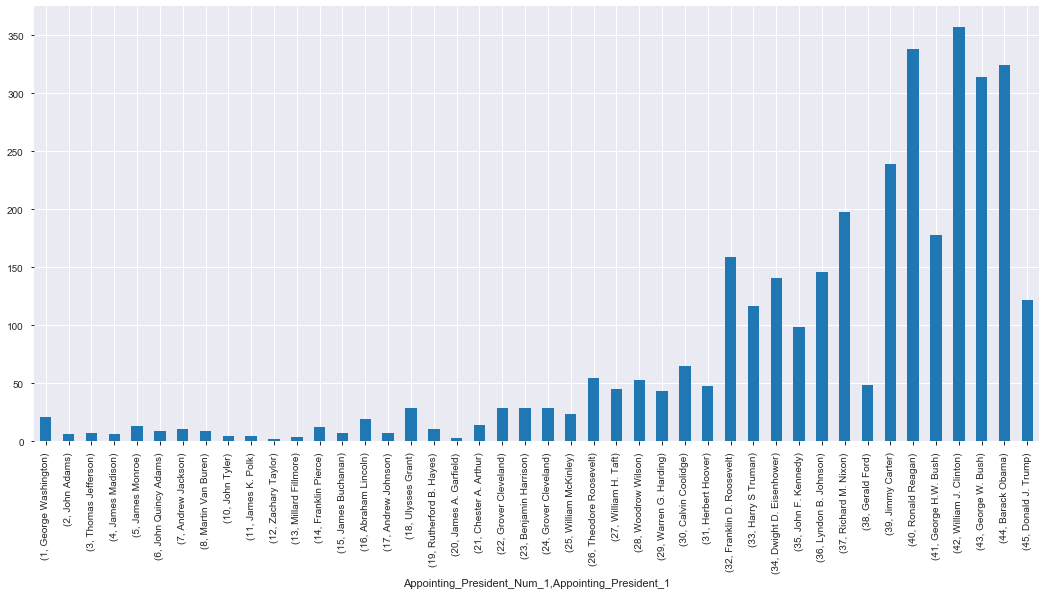

In [23]:
df.groupby(by='Appointing_President_Num_1').Appointing_President_1.value_counts().plot(kind='bar',figsize=(18, 8))

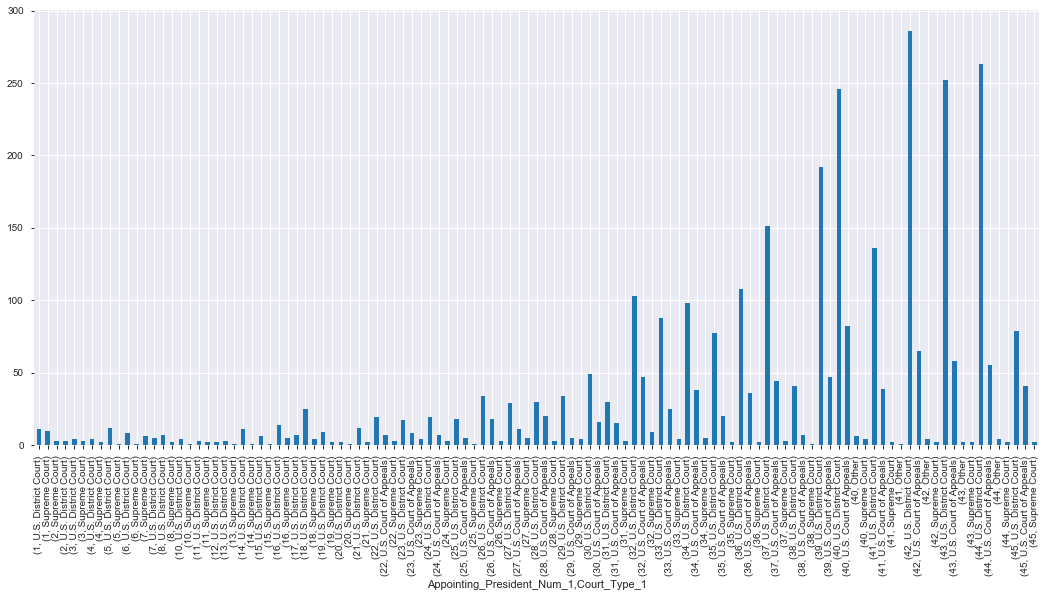

In [24]:
df.groupby(by='Appointing_President_Num_1').Court_Type_1.value_counts().plot(kind='bar',figsize=(18, 8))

### Qualifications
- ABA Rating
- Committee Recommendations
- Termination Types

In [25]:
df.ABA_Rating_1.value_counts()

Well Qualified                    1268
Qualified                          890
Not Qualified                       16
Exceptionally Well Qualified        14
Not Qualified By Reason of Age       2
Name: ABA_Rating_1, dtype: int64

In [26]:
df[df.ABA_Rating_1.str.contains("Not", na=False)]['Appointing_President_1'].value_counts()

Lyndon B. Johnson     5
Donald J. Trump       4
George W. Bush        4
Jimmy Carter          2
William J. Clinton    2
John F. Kennedy       1
Name: Appointing_President_1, dtype: int64

In [27]:
df[df.ABA_Rating_1.str.contains("Not", na=False)][['Full_Name','ABA_Rating_1','Appointing_President_1','Confirmation_Date_1']].sort_values(by='Confirmation_Date_1', ascending=False)

,Full_Name,ABA_Rating_1,Appointing_President_1,Confirmation_Date_1
1030,NaN,Not Qualified,Donald J. Trump,2018-12-11
2726,NaN,Not Qualified,Donald J. Trump,2018-08-28
1403,NaN,Not Qualified,Donald J. Trump,2018-08-01
1028,NaN,Not Qualified,Donald J. Trump,2017-12-12
2945,Gregory Frederick Van Tatenhove,Not Qualified,George W. Bush,2005-12-21
1580,Dora L. Irizarry,Not Qualified,George W. Bush,2004-06-24
366,Roger T. Benitez,Not Qualified,George W. Bush,2004-06-17
2944,David L. Bunning,Not Qualified,George W. Bush,2002-02-14
314,David A. Katz,Not Qualified,William J. Clinton,1994-10-07
170,"Alexander Williams, Jr.",Not Qualified,William J. Clinton,1994-08-17


In [28]:
df[df.ABA_Rating_2.str.contains("Not", na=False)][['Full_Name','ABA_Rating_2','Appointing_President_2','Confirmation_Date_2']].sort_values(by='Confirmation_Date_2', ascending=False)

,Full_Name,ABA_Rating_2,Appointing_President_2,Confirmation_Date_2
1232,David Frank Hamilton,Not Qualified,William J. Clinton,1994-10-07
851,Donald Eugene O'Brien,Not Qualified,Jimmy Carter,1978-10-04
3040,Sidney Lee Christie,Not Qualified By Reason of Age,Lyndon B. Johnson,1964-04-30


In [29]:
df.Judiciary_Committee_Action_1.value_counts()

Reported (favorably)                     3202
Reported (no recommendation recorded)      62
Not Referred to Committee                  59
No Committee before December 10, 1816      40
Not Reported                               11
Reported (unknown)                          9
Reported (unfavorably)                      8
Reported (without recommendation)           6
Name: Judiciary_Committee_Action_1, dtype: int64

In [30]:
df[~df.Judiciary_Committee_Action_1.str.contains("\(favorably", na=False)][['Full_Name','Judiciary_Committee_Action_1','Appointing_President_1','Confirmation_Date_1']].sort_values(by='Confirmation_Date_1', ascending=False).dropna().head(60)

,Full_Name,Judiciary_Committee_Action_1,Appointing_President_1,Confirmation_Date_1
2478,J[ames] Leon Holmes,Reported (without recommendation),George W. Bush,2004-07-06
64,Clarence Thomas,Reported (without recommendation),George H.W. Bush,1991-10-15
1223,Daniel Anthony Manion,Reported (without recommendation),Ronald Reagan,1986-06-26
2744,John Joseph Hickey,Reported (no recommendation recorded),Lyndon B. Johnson,1966-06-09
1339,Collins Jacques Seitz,Reported (no recommendation recorded),Lyndon B. Johnson,1966-06-09
1517,Frederick Jacob Reagan Heebe,Reported (no recommendation recorded),Lyndon B. Johnson,1966-03-25
2459,Russell Evans Smith,Reported (no recommendation recorded),Lyndon B. Johnson,1966-03-25
1305,"George Clifton Edwards, Jr.",Reported (no recommendation recorded),John F. Kennedy,1963-12-16
666,Edward Dumbauld,Not Reported,John F. Kennedy,1961-08-02
1033,Albert Alphonso Ridge,Reported (no recommendation recorded),John F. Kennedy,1961-06-14


In [31]:
df.Termination_1.value_counts()

Death                               1540
Retirement                           283
Resignation                          213
Recess Appointment-Not Confirmed      16
Impeachment & Conviction               8
Name: Termination_1, dtype: int64

In [32]:
df[df.Termination_1.str.contains("Impeachment", na=False)][['Full_Name','Termination_1','Appointing_President_1','Confirmation_Date_1']].sort_values(by='Confirmation_Date_1', ascending=False)

,Full_Name,Termination_1,Appointing_President_1,Confirmation_Date_1
1531,"G. Thomas Porteous, Jr.",Impeachment & Conviction,William J. Clinton,1994-10-07
2245,Alcee Lamar Hastings,Impeachment & Conviction,Jimmy Carter,1979-10-31
741,Harry E. Claiborne,Impeachment & Conviction,Jimmy Carter,1978-08-11
3023,"Walter Louis Nixon, Jr.",Impeachment & Conviction,Lyndon B. Johnson,1968-06-06
2189,Halsted Lockwood Ritter,Impeachment & Conviction,Calvin Coolidge,1929-02-15
1345,Robert Wodrow Archbald,Impeachment & Conviction,William H. Taft,1911-01-31
399,West Hughes Humphreys,Impeachment & Conviction,Franklin Pierce,1853-03-26
2934,John Pickering,Impeachment & Conviction,George Washington,1795-02-11


In [33]:
df[df.Termination_1.str.contains("Recess", na=False)][['Full_Name','Termination_1','Appointing_President_1','Recess_Appointment_Date_1']].sort_values(by='Recess_Appointment_Date_1', ascending=False)

,Full_Name,Termination_1,Appointing_President_1,Recess_Appointment_Date_1
3154,Walter Meheula Heen,Recess Appointment-Not Confirmed,Jimmy Carter,1981-01-01
2039,David Rabinovitz,Recess Appointment-Not Confirmed,Lyndon B. Johnson,1964-01-07
1694,Monroe Mark Friedman,Recess Appointment-Not Confirmed,Harry S Truman,1952-07-17
811,Maurice Neil Andrews,Recess Appointment-Not Confirmed,Harry S Truman,1949-10-21
2249,Carroll O. Switzer,Recess Appointment-Not Confirmed,Harry S Truman,1949-10-21
902,Floyd H. Roberts,Recess Appointment-Not Confirmed,Franklin D. Roosevelt,1938-07-06
1754,George E. Q. Johnson,Recess Appointment-Not Confirmed,Herbert Hoover,1932-08-03
2339,Wallace McCamant,Recess Appointment-Not Confirmed,Calvin Coolidge,1925-05-25
2205,John Moses Cheney,Recess Appointment-Not Confirmed,William H. Taft,1912-08-26
2320,Clinton Woodbury Howard,Recess Appointment-Not Confirmed,William H. Taft,1912-08-26


### Declined & Rejected Appointments

In [34]:
df[df.Other_Nominations_n_Recess_Appointments.str.contains("(?i)Declined", na=False)][['Full_Name','Other_Nominations_n_Recess_Appointments','Appointing_President_1','Confirmation_Date_1']].sort_values(by='Confirmation_Date_1', ascending=False)

,Full_Name,Other_Nominations_n_Recess_Appointments,Appointing_President_1,Confirmation_Date_1
1076,Herbert Stephenson Boreman,Received recess appointment to U.S. Court of A...,Dwight D. Eisenhower,1959-06-16
1991,James V. Allred,Received recess appointment to U.S. District C...,Harry S Truman,1949-10-12
1435,James William McCarthy,Nominated to U.S. District Court for the Distr...,Calvin Coolidge,1929-01-08
718,Frank Herbert Norcross,Received recess appointment to U.S. Court of A...,Calvin Coolidge,1928-04-17
6,William Rufus Day,Received recess appointment to U.S. District C...,Theodore Roosevelt,1903-02-23
2294,Robert Paine Dick,Received recess appointment to U.S. District C...,Ulysses Grant,1872-06-07
2643,Solomon Lewis Withey,Nominated to U.S. District Court for the Weste...,Abraham Lincoln,1863-03-11
94,Henry Brockholst Livingston,Received recess appointment to U.S. District C...,Thomas Jefferson,1806-12-17
78,Thomas Johnson,Nominated to U.S. District Court for the Distr...,George Washington,1791-11-07
210,Thomas Bee,Nominated to be chief judge of the U.S. Circui...,George Washington,1790-06-14


In [35]:
df[df.Other_Nominations_n_Recess_Appointments.str.contains("(?i)Rejected", na=False)][['Full_Name','Other_Nominations_n_Recess_Appointments','Appointing_President_1','Confirmation_Date_1']].sort_values(by='Confirmation_Date_1', ascending=False)

,Full_Name,Other_Nominations_n_Recess_Appointments,Appointing_President_1,Confirmation_Date_1
256,Ronnie Lee White,Nominated to U.S. District Court for the Easte...,Barack Obama,2014-07-16
961,Robert Heron Bork,Nominated to Supreme Court of the United State...,Ronald Reagan,1982-02-08
2064,George Harrold Carswell,Nominated to Supreme Court of the United State...,Richard M. Nixon,1969-06-19
1077,"Clement Furman Haynsworth, Jr.",Nominated to Supreme Court of the United State...,Dwight D. Eisenhower,1957-04-04
1069,John Johnston Parker,Nominated to Supreme Court of the United State...,Calvin Coolidge,1925-12-14
428,Ezekiel B. Turner,Nominated to U.S. District Court for the North...,Rutherford B. Hayes,1880-12-20
76,John Rutledge,Nominated to be Chief Justice of the Supreme C...,George Washington,NaT
811,Maurice Neil Andrews,Nominated to U.S. District Court for the North...,Harry S Truman,NaT
902,Floyd H. Roberts,Nominated to U.S. District Court for the Weste...,Franklin D. Roosevelt,NaT
2249,Carroll O. Switzer,Nominated to U.S. District Court for the South...,Harry S Truman,NaT


In [36]:
df['Other_Nomination'] = df["Other_Nominations_n_Recess_Appointments"].str.findall(r"\b(nominated.*\d\d\d\d); .*", flags = re.I).dropna(0)
df['Other_Rejection'] = df["Other_Nominations_n_Recess_Appointments"].str.findall(r"\b(rejected.*\d\d\d\d).*", flags = re.I).dropna(0)
df[df.Other_Nominations_n_Recess_Appointments.str.contains(r"rejected", na=False, flags = re.I)][['Full_Name','Other_Nomination','Other_Rejection','Appointing_President_1','Confirmation_Date_1']].sort_values(by='Confirmation_Date_1', ascending=False)

,Full_Name,Other_Nomination,Other_Rejection,Appointing_President_1,Confirmation_Date_1
256,Ronnie Lee White,[Nominated to U.S. District Court for the East...,"[rejected by Senate, October 5, 1999; Nominate...",Barack Obama,2014-07-16
961,Robert Heron Bork,[Nominated to Supreme Court of the United Stat...,"[rejected by Senate, October 23, 1987]",Ronald Reagan,1982-02-08
2064,George Harrold Carswell,[Nominated to Supreme Court of the United Stat...,"[rejected by Senate, April 8, 1970]",Richard M. Nixon,1969-06-19
1077,"Clement Furman Haynsworth, Jr.",[Nominated to Supreme Court of the United Stat...,"[rejected by Senate, November 21, 1969]",Dwight D. Eisenhower,1957-04-04
1069,John Johnston Parker,[Nominated to Supreme Court of the United Stat...,"[rejected by Senate, May 7, 1930]",Calvin Coolidge,1925-12-14
428,Ezekiel B. Turner,[Nominated to U.S. District Court for the Nort...,"[rejected by Senate, April 2, 1879]",Rutherford B. Hayes,1880-12-20
76,John Rutledge,[Nominated to be Chief Justice of the Supreme ...,"[rejected by Senate, December 15, 1795; resign...",George Washington,NaT
811,Maurice Neil Andrews,[Nominated to U.S. District Court for the Nort...,"[rejected by Senate, August 9, 1950; resigned,...",Harry S Truman,NaT
902,Floyd H. Roberts,[Nominated to U.S. District Court for the West...,"[rejected by Senate, February 6, 1939; resigne...",Franklin D. Roosevelt,NaT
2249,Carroll O. Switzer,[Nominated to U.S. District Court for the Sout...,"[rejected by Senate, August 9, 1950; resigned,...",Harry S Truman,NaT


### Confirmation Lengths

In [37]:
df['Confirmation_Duration_Total'] = df.Confirmation_Date_1 - df.Nomination_Date_1
df.Confirmation_Duration_Total.sort_values(ascending=False).describe()

count                       3380
mean     76 days 13:18:23.431952
std      81 days 20:33:16.412779
min              0 days 00:00:00
25%             17 days 00:00:00
50%             47 days 00:00:00
75%            112 days 06:00:00
max            639 days 00:00:00
Name: Confirmation_Duration_Total, dtype: object

In [38]:
df.groupby(by='Appointing_President_1').Confirmation_Duration_Total.max().sort_values(ascending=False)

Appointing_President_1
William J. Clinton      639 days
Ronald Reagan           540 days
Jimmy Carter            539 days
George W. Bush          524 days
Barack Obama            460 days
Donald J. Trump         355 days
George H.W. Bush        317 days
Gerald Ford             317 days
Dwight D. Eisenhower    254 days
John F. Kennedy         248 days
Zachary Taylor          224 days
Lyndon B. Johnson       216 days
Franklin D. Roosevelt   209 days
Harry S Truman          195 days
Richard M. Nixon        194 days
Theodore Roosevelt      169 days
Woodrow Wilson          125 days
Benjamin Harrison       117 days
John Quincy Adams       108 days
Andrew Jackson          105 days
Herbert Hoover           99 days
Abraham Lincoln          92 days
Grover Cleveland         81 days
Ulysses Grant            73 days
William McKinley         64 days
James A. Garfield        59 days
Calvin Coolidge          52 days
William H. Taft          50 days
Warren G. Harding        45 days
Rutherford B. Hayes 

In [39]:
df.loc[df.Confirmation_Duration_Total.idxmax()][['Full_Name','Confirmation_Duration_Total','Appointing_President_1','Court_Name_1']]

Full_Name                                              William A. Fletcher
Confirmation_Duration_Total                              639 days 00:00:00
Appointing_President_1                                  William J. Clinton
Court_Name_1                   U.S. Court of Appeals for the Ninth Circuit
Name: 2396, dtype: object

In [40]:
df.loc[df.Party_of_Reappointing_President_1 != df.Party_of_Appointing_President_1][['Full_Name','Appointing_President_1','Reappointing_President_1','Recess_Appointment_Date_1','Nomination_Date_1','Confirmation_Date_1']].dropna().sort_values(by='Confirmation_Date_1', ascending=False)

,Full_Name,Appointing_President_1,Reappointing_President_1,Recess_Appointment_Date_1,Nomination_Date_1,Confirmation_Date_1
1101,Roger L. Gregory,William J. Clinton,George W. Bush,2000-12-27,2001-05-09,2001-07-20


### Appointment Lengths

In [41]:
df['Service_Duration_1'] = df[['Termination_Date_1','Senior_Status_Date_1']].max(axis=1) - df.Commission_Date_1
df.Service_Duration_1.sort_values(ascending=False).describe()

count                         2635
mean     7458 days 03:30:23.908918
std      3967 days 15:36:30.839087
min               21 days 00:00:00
25%             4580 days 00:00:00
50%             6984 days 00:00:00
75%            10247 days 00:00:00
max            20245 days 00:00:00
Name: Service_Duration_1, dtype: object

In [42]:
df.loc[df.Service_Duration_1.idxmax()][['Full_Name','Service_Duration_1','Appointing_President_1','Court_Name_1']]

Full_Name                                        William Joseph Nealon, Jr.
Service_Duration_1                                      20245 days 00:00:00
Appointing_President_1                                      John F. Kennedy
Court_Name_1              U.S. District Court for the Middle District of...
Name: 2610, dtype: object

In [43]:
df[(df.Appointing_President_1.str.contains(' W. ')) & (df.Termination_Date_1 < '20080115')][['Full_Name','Court_Type_1','Confirmation_Date_1','Termination_1','Termination_Date_1']].sort_values(by=['Confirmation_Date_1','Termination_Date_1'],ascending=[0,1])

,Full_Name,Court_Type_1,Confirmation_Date_1,Termination_1,Termination_Date_1
1280,Susan Bieke Neilson,U.S. Court of Appeals,2005-10-27,Death,2006-01-25
3126,Phillip S. Figa,U.S. District Court,2003-10-02,Death,2008-01-05
2301,H[arold] Brent McKnight,U.S. District Court,2003-07-31,Death,2004-11-27
1350,Michael Chertoff,U.S. Court of Appeals,2003-06-09,Resignation,2005-02-15
2142,Paul G. Cassell,U.S. District Court,2002-05-13,Resignation,2007-11-05
2078,"Charles Willis Pickering, Sr.",U.S. Court of Appeals,NaT,Retirement,2004-12-08


In [44]:
df['Service_Duration_2'] = df[['Termination_Date_2','Senior_Status_Date_2']].max(axis=1) - df.Commission_Date_2
df.Service_Duration_2.sort_values(ascending=False).describe()

count                          401
mean     3662 days 16:09:34.563591
std      2695 days 07:59:25.824664
min              161 days 00:00:00
25%             1475 days 00:00:00
50%             3390 days 00:00:00
75%             5340 days 00:00:00
max            16447 days 00:00:00
Name: Service_Duration_2, dtype: object

### Demographics Breakdowns

In [45]:
### Appointments from President's home state = This can't be right

df[df.Birth_State.isin(df.Appointing_President_State_1)].groupby(by='Appointing_President_1').Appointing_President_State_1.value_counts().sort_values(ascending=False)

Appointing_President_1  Appointing_President_State_1
Ronald Reagan           CA                              225
William J. Clinton      AK                              218
George W. Bush          TX                              194
Barack Obama            IL                              194
Jimmy Carter            GA                              143
Richard M. Nixon        CA                              127
George H.W. Bush        TX                              112
Franklin D. Roosevelt   NY                               96
Dwight D. Eisenhower    KS                               87
Harry S Truman          MO                               76
Lyndon B. Johnson       TX                               73
Donald J. Trump         NY                               71
John F. Kennedy         MA                               59
Calvin Coolidge         MA                               40
Theodore Roosevelt      NY                               39
Grover Cleveland        NY                     

In [46]:
df.groupby(by='Party_of_Appointing_President_1').Gender.value_counts(1)

Party_of_Appointing_President_1  Gender
Democratic                       Male      0.825951
                                 Female    0.174049
Federalist                       Male      1.000000
Jeffersonian Republican          Male      1.000000
Republican                       Male      0.911884
                                 Female    0.088116
Whig                             Male      1.000000
Name: Gender, dtype: float64

In [47]:
df.groupby(by='Party_of_Appointing_President_1').Race_or_Ethnicity.value_counts(1)

Party_of_Appointing_President_1  Race_or_Ethnicity              
Democratic                       White                              0.835309
                                 AfriAmerican                       0.099813
                                 Hispanic                           0.043044
                                 Asian American                     0.014348
                                 AmeriIndian                        0.001871
                                 AfriAmerican/Hispanic              0.001248
                                 Asian American/Pacific Islander    0.001248
                                 Hispanic/White                     0.001248
                                 AfriAmerican/White                 0.000624
                                 Asian American/Hispanic            0.000624
                                 Asian American/White               0.000624
Federalist                       White                              1.000000
Jeffersonia

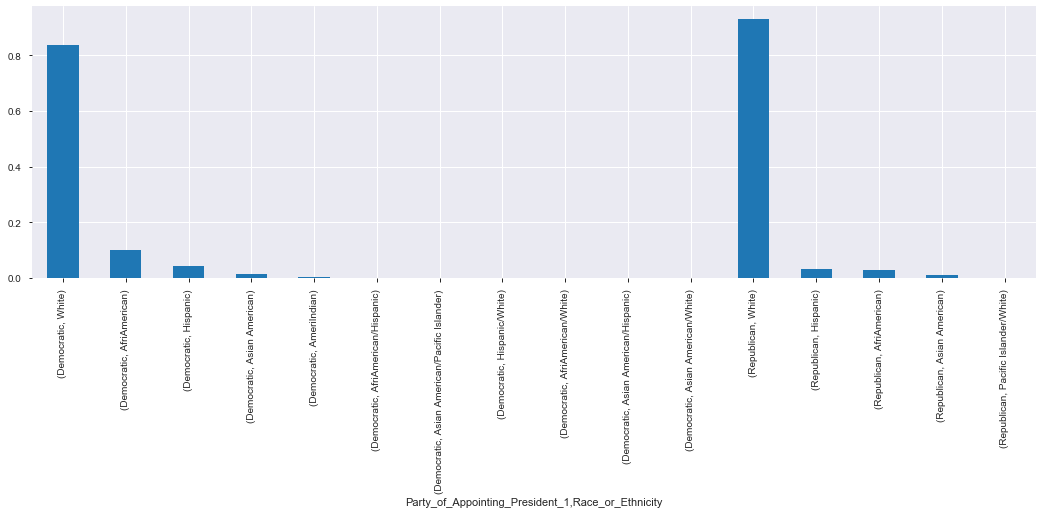

In [48]:
df[(df.Party_of_Appointing_President_1 == 'Democratic') | (df.Party_of_Appointing_President_1 == 'Republican')].groupby(by='Party_of_Appointing_President_1').Race_or_Ethnicity.value_counts(1).plot(kind='bar',figsize=(18, 5))

In [49]:
# Rcount = df.groupby(by='Party_of_Appointing_President_1').Race_or_Ethnicity.value_counts()
# Rcount = df.Race_or_Ethnicity.value_counts()
# sns.barplot(data=df, x='Rcount', y='Rcount', col='Party_of_Appointing_President_1', height=3)
# sns.barplot(y=Rcount.index, x=Rcount.values, col='Party_of_Appointing_President_1', height=3)
# sns.barplot(ydata=df, y='Race_or_Ethnicity'.index, x='Race_or_Ethnicity'.values, col='Party_of_Appointing_President_1', height=3)
# sns.barplot(data=df, x='Rcount', y='Rcount', col='Party_of_Appointing_President_1', height=3)

In [50]:
df['Appointment_Age_1'] =  ((df.Nomination_Date_1 - df.Birth_Date)/np.timedelta64(1, 'Y'))
df.Appointment_Age_1.sort_values(ascending=False).describe()

count    3397.000000
mean       51.009547
std         6.832302
min        25.347543
25%        46.265153
50%        51.198861
75%        56.009364
max        70.279335
Name: Appointment_Age_1, dtype: float64

In [51]:
df.loc[df.Appointment_Age_1.idxmax()][['Full_Name','Appointment_Age_1','Appointing_President_1','Court_Name_1']]

Full_Name                                   Charles Breckenridge Faris
Appointment_Age_1                                              70.2793
Appointing_President_1                           Franklin D. Roosevelt
Court_Name_1              U.S. Court of Appeals for the Eighth Circuit
Name: 985, dtype: object

In [52]:
df.loc[df.Appointment_Age_1.idxmin()][['Full_Name','Appointment_Age_1','Appointing_President_1','Court_Name_1']]

Full_Name                                          Thomas Jefferson Boynton
Appointment_Age_1                                                   25.3475
Appointing_President_1                                      Abraham Lincoln
Court_Name_1              U.S. District Court for the Southern District ...
Name: 2195, dtype: object

In [53]:
df['Appointment_Age_Earliest'] = ((df[['Nomination_Date_1','Nomination_Date_2','Nomination_Date_3','Nomination_Date_4','Nomination_Date_5']].min(axis=1) - df.Birth_Date)/np.timedelta64(1, 'Y'))
df.loc[df.Appointment_Age_Earliest.idxmin()][['Full_Name','Appointment_Age_Earliest']]

Full_Name                   Thomas Jefferson Boynton
Appointment_Age_Earliest                     25.3475
Name: 2195, dtype: object

In [54]:
df.loc[(df.Appointment_Age_1.idxmin()) & (df.Court_Type_1 == 'Supreme Court')][['Full_Name','Appointment_Age_1']].sort_values(by='Appointment_Age_1').head()

,Full_Name,Appointment_Age_1
101,Joseph Story,32.156718
95,"William Johnson, Jr.",32.233379
86,Bushrod Washington,36.540107
84,James Iredell,38.347126
15,William Orville Douglas,40.422459


### Professional Background

In [55]:
df.Professional_Career.head()

0    Private practice, Washington, Georgia, 1829; P...
1    Private practice, Newfield, Maine, 1827-1830, ...
2    Private secretary, Gov. William Seward, New Yo...
3    Private practice, Boston, Massachusetts, 1851-...
4    U.S. Army lieutenant, 20th Massachusetts Volun...
Name: Professional_Career, dtype: object

In [56]:
df.Professional_Career = df.Professional_Career.astype(str)
# Counter(" ".join(df.Professional_Career).lower().split()).most_common(60)
pd.Series(' '.join(df.Professional_Career).lower().split()).value_counts().head(60)

of               6359
private          4086
practice,        4058
u.s.             3808
district         2245
attorney,        1844
the              1807
assistant        1744
new              1681
judge,           1436
court            1405
law              1245
court,           1242
state            1168
judicial         1086
attorney          918
clerk,            917
county,           854
hon.              809
for               787
and               776
county            737
member,           711
california,       696
justice,          641
united            627
counsel,          608
law,              607
states,           573
university        555
circuit,          555
army              543
york,             538
general,          536
pennsylvania,     515
texas,            477
supreme           475
deputy            466
york              458
department        454
conference        453
city,             448
city              437
washington,       435
special           425
illinois, 

In [57]:
df[df.Professional_Career.str.contains('army|navy|marine|force', na=False, flags = re.I)].groupby(by='Appointing_President_1').size().sort_values(ascending=False).head(15)

Appointing_President_1
Ronald Reagan            175
Jimmy Carter             152
Richard M. Nixon         131
Lyndon B. Johnson         85
George H.W. Bush          69
William J. Clinton        67
George W. Bush            55
Dwight D. Eisenhower      54
Franklin D. Roosevelt     42
Harry S Truman            41
John F. Kennedy           39
Gerald Ford               37
Barack Obama              28
Grover Cleveland          24
Donald J. Trump           16
dtype: int64

In [58]:
search_terms = ['professor','lecturer','faculty','dean']
df[df.Professional_Career.str.contains('|'.join(search_terms),na=False,case=False)].groupby(by='Appointing_President_1').size().sort_values(ascending=False).head(15)

Appointing_President_1
William J. Clinton       87
George W. Bush           68
Ronald Reagan            66
Jimmy Carter             55
Barack Obama             45
Donald J. Trump          34
George H.W. Bush         24
Franklin D. Roosevelt    24
Richard M. Nixon         23
Lyndon B. Johnson        19
Dwight D. Eisenhower     14
Harry S Truman           11
Grover Cleveland          8
John F. Kennedy           8
William H. Taft           7
dtype: int64

In [59]:
### Gave up trying to roll my own, found a ngrams library online

from sklearn.feature_extraction.text import CountVectorizer
word_vectorizer = CountVectorizer(ngram_range=(2,2), analyzer='word')
sparse_matrix = word_vectorizer.fit_transform(df.Professional_Career)
frequencies = sum(sparse_matrix).toarray()[0]
pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency']).sort_values(by='frequency', ascending=False).head(20)

,frequency
private practice,4063
court of,1345
district of,1330
new york,1041
of the,937
assistant attorney,909
law clerk,860
clerk hon,774
for the,620
united states,615


In [60]:
from sklearn.feature_extraction.text import CountVectorizer
word_vectorizer = CountVectorizer(ngram_range=(3,4), analyzer='word')
sparse_matrix = word_vectorizer.fit_transform(df.Professional_Career)
frequencies = sum(sparse_matrix).toarray()[0]
pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency']).sort_values(by='frequency', ascending=False).head(20)

,frequency
law clerk hon,772
of the united,608
the united states,607
of the united states,606
conference of the united,412
conference of the,412
judicial conference of,409
judicial conference of the,409
court of appeals,385
member judicial conference of,367


### Education

In [61]:
lastreadlaw = [df[df['School_1'] == 'Read law'].Degree_Year_1.max(),
               df[df['School_2'] == 'Read law'].Degree_Year_3.max(), 
               df[df['School_3'] == 'Read law'].Degree_Year_3.max(),
               df[df['School_4'] == 'Read law'].Degree_Year_4.max(), 
               df[df['School_5'] == 'Read law'].Degree_Year_5.max()
              ]
lastreadlaw

[Timestamp('1934-01-01 00:00:00'),
 Timestamp('1925-01-01 00:00:00'),
 Timestamp('1930-01-01 00:00:00'),
 Timestamp('1927-01-01 00:00:00'),
 Timestamp('1910-01-01 00:00:00')]

In [62]:
allschool_df = df[['Full_Name','Appointing_President_1','Party_of_Appointing_President_1']]
allschool_df['Schl1'] = df.School_1 + '-777777777-' + df.Degree_1.fillna('nun') + '-999999999-' + df.Degree_Year_1.astype(str).fillna('nun')
allschool_df['Schl2'] = df.School_2 + '-777777777-' + df.Degree_2.fillna('nun') + '-999999999-' + df.Degree_Year_2.astype(str).fillna('nun')
allschool_df['Schl3'] = df.School_3 + '-777777777-' + df.Degree_3.fillna('nun') + '-999999999-' + df.Degree_Year_3.astype(str).fillna('nun')
allschool_df['Schl4'] = df.School_4 + '-777777777-' + df.Degree_4.fillna('nun') + '-999999999-' + df.Degree_Year_4.astype(str).fillna('nun')
allschool_df['Schl5'] = df.School_5 + '-777777777-' + df.Degree_5.fillna('nun') + '-999999999-' + df.Degree_Year_5.astype(str).fillna('nun')

C:\Program Files (x86)\Python37-32\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Program Files (x86)\Python37-32\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Program Files (x86)\Python37-32\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

In [63]:
allschool_df = allschool_df.melt(id_vars =['Full_Name','Appointing_President_1','Party_of_Appointing_President_1'], value_vars =['Schl1','Schl2','Schl3','Schl4','Schl5'], var_name='Degree_Number', value_name='School')

In [64]:
allschool_df.Degree_Number.replace(r'Schl',r'',regex=True,inplace=True)
allschool_df['Degree'] = allschool_df.School.str.extract('-777777777-(.*)-999999999-', expand=False)
allschool_df['Degree_Year'] = allschool_df.School.str.extract('.*-999999999-(.*)$', expand=False)
allschool_df['School'] = allschool_df.School.str.extract(r'(.*)-777777777-.*', expand=False)
allschool_df['DYear'] = allschool_df.Degree_Year.str.extract('^(\d\d\d\d).*', expand=False)
allschool_df.replace('nun',np.nan,inplace=True)
allschool_df.Degree_Year = allschool_df.Degree_Year.astype('datetime64[ns]') 

In [65]:
allschool_df.head(15)

,Full_Name,Appointing_President_1,Party_of_Appointing_President_1,Degree_Number,School,Degree,Degree_Year,DYear
0,John Archibald Campbell,Franklin Pierce,Democratic,1,Franklin College (now University of Georgia),NaN,1825-01-01,1825
1,Nathan Clifford,James Buchanan,Democratic,1,Read law,NaN,1827-01-01,1827
2,Samuel M. Blatchford,Chester A. Arthur,Republican,1,Columbia College,B.A.,1837-01-01,1837
3,Horace Gray,Chester A. Arthur,Republican,1,Harvard College,B.A.,1845-01-01,1845
4,"Oliver Wendell Holmes, Jr.",Theodore Roosevelt,Republican,1,Harvard College,A.B.,1861-01-01,1861
5,William Henry Moody,Theodore Roosevelt,Republican,1,Harvard Law School,NaN,NaT,NaN
6,William Rufus Day,Theodore Roosevelt,Republican,1,University of Michigan,NaN,NaT,NaN
7,James Clark McReynolds,Woodrow Wilson,Democratic,1,Vanderbilt University,B.S.,1882-01-01,1882
8,Louis Dembitz Brandeis,Woodrow Wilson,Democratic,1,Harvard Law School,LL.B.,1877-01-01,1877
9,John Hessin Clarke,Woodrow Wilson,Democratic,1,Western Reserve College (now Case Western Rese...,A.B.,1877-01-01,1877


In [66]:
allschool_df['School_Neat'] = allschool_df['School']
allschool_df.School_Neat.replace(r'.*\(now (.*)\)',r'\1',regex=True,inplace=True)
allschool_df.replace({'School_Neat':{
    'College of':'Cof',
    ' College':'',
    'University of':'Uof',
    ' University':'',
    ' Department':'',
    ' Faculty':'',
    ' School':'',
    ' Center':'',
    ' of Law':'',
    ' Law':'',
    ' of Jurisprudence':'',
    ' of Business':'',
    ' Business':'',
    ' Administration':'',
    ' Wharton':'',
    ' Gould':'',
    ', Boalt Hall':'',
    ', Paul M. Hebert':'',
    '-Kansas City':'',
    ' -- Newark':'',
    ' -- Camden':'',
    '  ':' '
}},regex=True,inplace=True)
allschool_df.School_Neat.replace(r'\s?Cof','',regex=True,inplace=True)
allschool_df.School_Neat.replace(r'\s?$','',regex=True,inplace=True)
allschool_df.School_Neat.replace(r',$','',regex=True,inplace=True)
allschool_df.School_Neat.value_counts().head(60)

Harvard                        460
Read law                       437
Yale                           271
Uof Michigan                   174
Uof Virginia                   165
Columbia                       154
Uof Texas                      147
Georgetown                     125
Uof Pennsylvania               112
Stanford                       102
Princeton                       98
New York                        87
Uof California, Berkeley        84
Uof Florida                     73
Uof Chicago                     68
George Washington               65
Cornell                         63
Uof Alabama                     62
Northwestern                    61
Louisiana State                 61
Uof Missouri                    60
Uof Oklahoma                    56
Uof Georgia                     53
Rutgers                         53
Uof North Carolina              52
Duke                            51
Uof Iowa                        49
Vanderbilt                      49
Uof Arkansas        

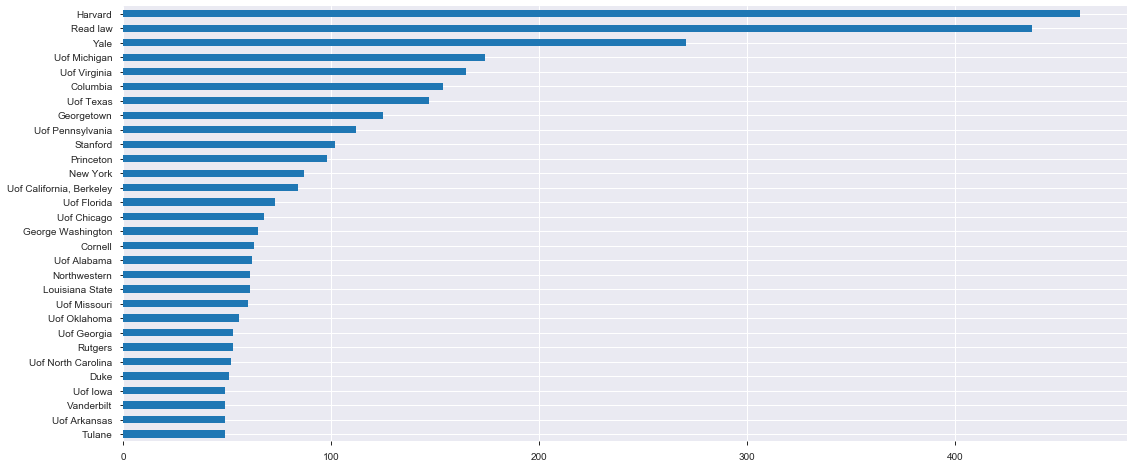

In [67]:
allschool_df.School_Neat.value_counts().head(30).plot(kind='barh', figsize=(18, 8), y='School_Neat').invert_yaxis()

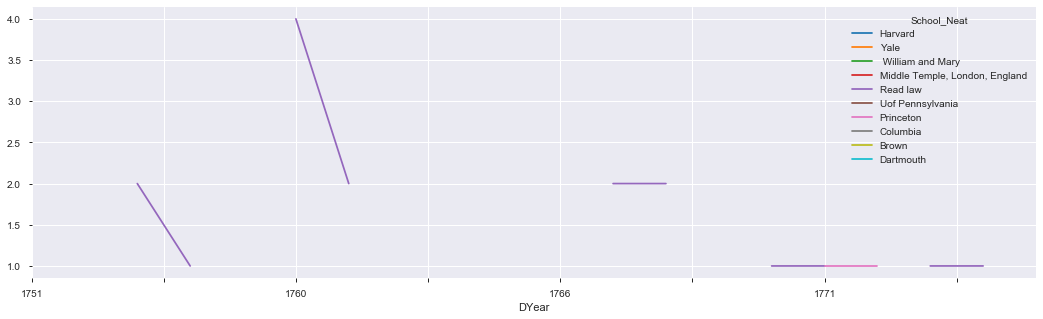

In [69]:
allschool_df.groupby(by='DYear').School_Neat.value_counts().head(30).unstack().plot(figsize=(18, 5), kind='line')

# allschool_df.School_Neat.value_counts().head(30).plot(kind='barh', figsize=(18, 8), y='School_Neat').invert_yaxis()
# allschool_df.School_Neat.value_counts().head(30).groupby(by='DYear').plot(kind='barh', figsize=(18, 8)).invert_yaxis()

# allschool_df.plot(x='DYear', y='School_Neat', figsize=(18, 5), lw=0.5)
# allschool_df.groupby(by='DYear').School_Neat.value_counts(1)

In [70]:
allschool_df.groupby(by='Party_of_Appointing_President_1').School_Neat.value_counts(1)

Party_of_Appointing_President_1  School_Neat                          
Democratic                       Harvard                                  0.070913
                                 Read law                                 0.050832
                                 Yale                                     0.041732
                                 Columbia                                 0.025730
                                 Uof Texas                                0.025102
                                 Uof Virginia                             0.022278
                                 Uof Michigan                             0.021650
                                 Georgetown                               0.020709
                                 Uof California, Berkeley                 0.015061
                                 Stanford                                 0.014747
                                 Uof Florida                              0.014747
                

In [71]:
allschool_df.Degree.value_counts().head(20)

J.D.          1663
B.A.          1366
LL.B.         1240
A.B.           717
B.S.           404
LL.M.          127
M.A.           119
B.B.A.          57
A.M.            50
A.A.            45
Ph.B.           29
M.S.            17
M.B.A.          16
Ph.D.           13
B.S.B.A.        10
M.P.A.           9
B.L.             7
B.S.L.           7
B.S.E.           6
B.A., B.S.       6
Name: Degree, dtype: int64

In [72]:
allschool_df['Degree_Neat'] = allschool_df['Degree']
allschool_df.replace({'Degree_Neat':{
    ', letters':'',
    ', business':'',
    ', economics':'',
    ', commerce':'',
    ', law':'',
    ', judicial studies':'',
    ', judicial process':'',
    ', politiphilosophy':'',
    ', civil engineering':'',
    ' of Completion':'',
    ' in Law':'',
    ' in English Law':'',
    ' in Legal Studies':'',
    ' in Jurisprudence':'',
    ' in Social Science':'',
    ' in Dispute Resolution':'',
    ' in Regulatory Economics':'',
    ' in International Arbitration':'',
    ' in Foreign and Comparative Law':'',
    ', Certificate of Business Studies':'',
    'Civil Mediator ':'',
}},regex=True,inplace=True)
allschool_df.replace({'Degree_Neat':{
    'D.Phil.':'Ph.D.',
    'A.B.':'B.A.',
    'A.M.':'M.A.',
    'B.L.':'LL.B.',
    'B.M.A.':'B.A.',
    'J.S.D.':'S.J.D.',
    'B.S.B.A.':'B.B.A.',
    'B.S.C.E.':'B.S.',
    'B.S.E.E.':'B.S.',
    'B.S.E.':'B.S.',
    'B.E.E.':'B.S.',
    'B.S.Ag.E.':'B.S.',
    'B.Sc.':'B.S.',
    'M.Sc.':'M.S.',
    'M.C.S.':'M.S.',
    '..':'',
    '  ':' '
}},regex=False,inplace=True)
allschool_df.Degree_Neat.value_counts().head(30)

B.A.           2088
J.D.           1663
LL.B.          1247
B.S.            420
M.A.            169
LL.M.           131
B.B.A.           67
A.A.             45
Ph.B.            29
M.S.             21
Ph.D.            16
M.B.A.           16
M.P.A.            9
S.J.D.            8
B.S.L.            7
Diploma           6
B.A., B.S.        6
Certificate       6
Litt.B.           5
M.S.W.            4
B.S.F.S.          4
M.Phil.           4
M.Ed.             3
M.A.T.            3
M.Litt.           3
M.J.S.            3
M.Div.            2
B.G.S.            2
Ph.G.             2
M.L.S.            2
Name: Degree_Neat, dtype: int64

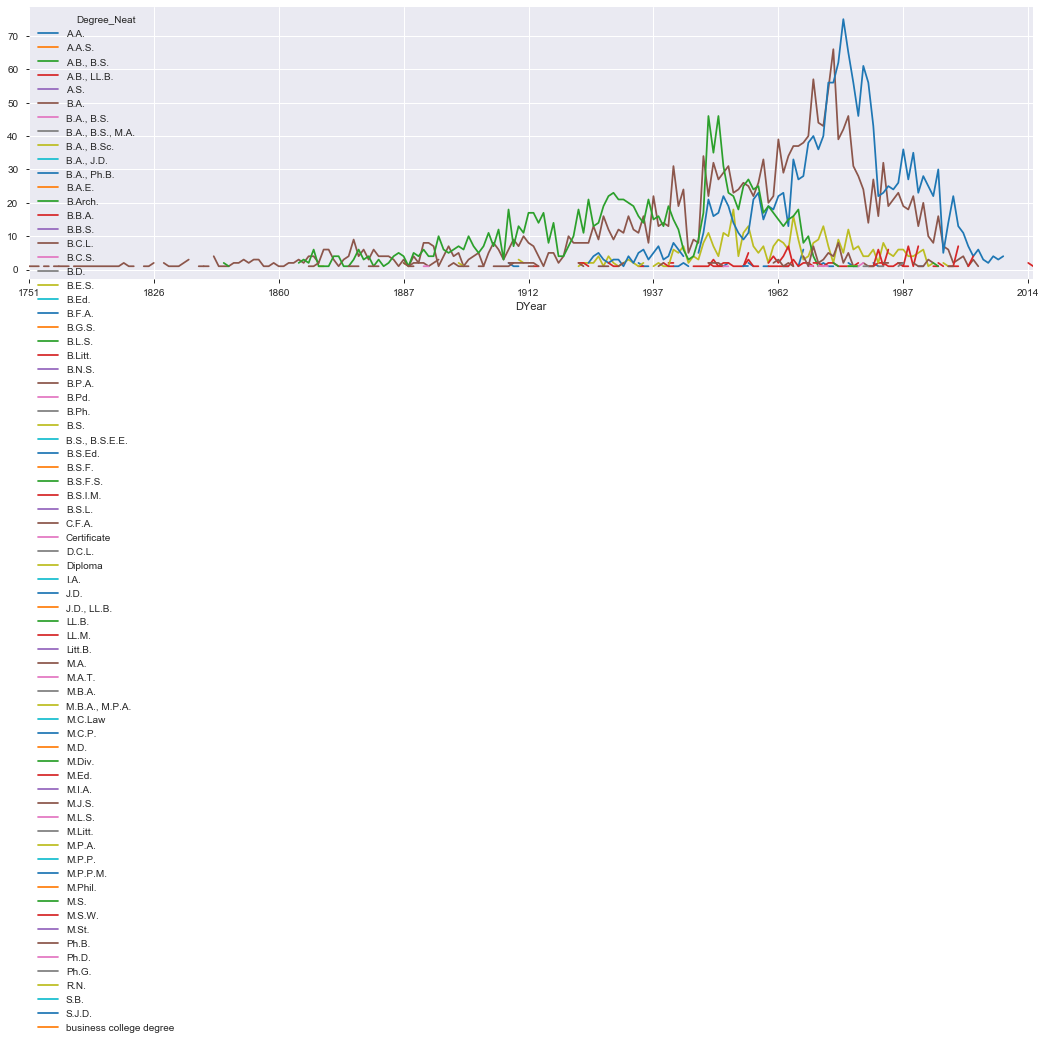

In [73]:
allschool_df.groupby(by='DYear').Degree_Neat.value_counts().unstack().plot(figsize=(18, 5), kind='line')

In [74]:
allschool_df.to_csv('allschool.csv', index=False)

# Possible Deletions

### Mostly Useless Info

In [ ]:
# df = df.drop(['nid','jid', 
#               'Seat_ID_1','Reappointing_President_1','Party_of_Reappointing_President_1','Statute_Authorizing_New_Seat_1','Service_as_Chief_Judge_Begin_1','Service_as_Chief_Judge_End_1','2nd_Service_as_Chief_Judge_Begin_1','2nd_Service_as_Chief_Judge_End_1',
#               'Seat_ID_2','Reappointing_President_2','Party_of_Reappointing_President_2','Statute_Authorizing_New_Seat_2','Service_as_Chief_Judge_Begin_2','Service_as_Chief_Judge_End_2','2nd_Service_as_Chief_Judge_Begin_2','2nd_Service_as_Chief_Judge_End_2',
#               'Seat_ID_3','Reappointing_President_3','Party_of_Reappointing_President_3','Statute_Authorizing_New_Seat_3','Service_as_Chief_Judge_Begin_3','Service_as_Chief_Judge_End_3','3nd_Service_as_Chief_Judge_Begin_3','3nd_Service_as_Chief_Judge_End_3',
#               'Seat_ID_4','Reappointing_President_4','Party_of_Reappointing_President_4','Statute_Authorizing_New_Seat_4','Service_as_Chief_Judge_Begin_4','Service_as_Chief_Judge_End_4','4nd_Service_as_Chief_Judge_Begin_4','4nd_Service_as_Chief_Judge_End_4',
#               'Seat_ID_5','Reappointing_President_5','Party_of_Reappointing_President_5','Statute_Authorizing_New_Seat_5','Service_as_Chief_Judge_Begin_5','Service_as_Chief_Judge_End_5','5nd_Service_as_Chief_Judge_Begin_5','5nd_Service_as_Chief_Judge_End_5',
#               'Seat_ID_6','Reappointing_President_6','Party_of_Reappointing_President_6','Statute_Authorizing_New_Seat_6','Service_as_Chief_Judge_Begin_6','Service_as_Chief_Judge_End_6','6nd_Service_as_Chief_Judge_Begin_6','6nd_Service_as_Chief_Judge_End_6'
#              ], axis=1)

### Complex Strings Requiring Detailed Parsing

In [ ]:
# df = df.drop(['Other_Federal_Judicial_Service_1','Other_Federal_Judicial_Service_2','Other_Federal_Judicial_Service_3','Other_Federal_Judicial_Service_4',
#               'Professional_Career','Other_Nominations_n_Recess_Appointments'
#              ], axis=1)

### If Concerned Only with Last Positions Held

In [ ]:
# df = df.drop([
#     'Court_Type_2','Court_Name_2','Appointment_Title_2','Appointing_President_2','Party_of_Appointing_President_2','Reappointing_President_2','Party_of_Reappointing_President_2','ABA_Rating_2','Seat_ID_2','Statute_Authorizing_New_Seat_2','Recess_Appointment_Date_2','Nomination_Date_2','Committee_Referral_Date_2','Hearing_Date_2','Judiciary_Committee_Action_2','Committee_Action_Date_2','Senate_Vote_Type_2','Ayes_n_Nays_2','Confirmation_Date_2','Commission_Date_2','Service_as_Chief_Judge_Begin_2','Service_as_Chief_Judge_End_2','2nd_Service_as_Chief_Judge_Begin_2','2nd_Service_as_Chief_Judge_End_2','Senior_Status_Date_2','Termination_2','Termination_Date_2',
#     'Court_Type_3','Court_Name_3','Appointment_Title_3','Appointing_President_3','Party_of_Appointing_President_3','Reappointing_President_3','Party_of_Reappointing_President_3','ABA_Rating_3','Seat_ID_3','Statute_Authorizing_New_Seat_3','Recess_Appointment_Date_3','Nomination_Date_3','Committee_Referral_Date_3','Hearing_Date_3','Judiciary_Committee_Action_3','Committee_Action_Date_3','Senate_Vote_Type_3','Ayes_n_Nays_3','Confirmation_Date_3','Commission_Date_3','Service_as_Chief_Judge_Begin_3','Service_as_Chief_Judge_End_3','2nd_Service_as_Chief_Judge_Begin_3','2nd_Service_as_Chief_Judge_End_3','Senior_Status_Date_3','Termination_3','Termination_Date_3',
#     'Court_Type_4','Court_Name_4','Appointment_Title_4','Appointing_President_4','Party_of_Appointing_President_4','Reappointing_President_4','Party_of_Reappointing_President_4','ABA_Rating_4','Seat_ID_4','Statute_Authorizing_New_Seat_4','Recess_Appointment_Date_4','Nomination_Date_4','Committee_Referral_Date_4','Hearing_Date_4','Judiciary_Committee_Action_4','Committee_Action_Date_4','Senate_Vote_Type_4','Ayes_n_Nays_4','Confirmation_Date_4','Commission_Date_4','Service_as_Chief_Judge_Begin_4','Service_as_Chief_Judge_End_4','2nd_Service_as_Chief_Judge_Begin_4','2nd_Service_as_Chief_Judge_End_4','Senior_Status_Date_4','Termination_4','Termination_Date_4',
#     'Court_Type_5','Court_Name_5','Appointment_Title_5','Appointing_President_5','Party_of_Appointing_President_5','Reappointing_President_5','Party_of_Reappointing_President_5','ABA_Rating_5','Seat_ID_5','Statute_Authorizing_New_Seat_5','Recess_Appointment_Date_5','Nomination_Date_5','Committee_Referral_Date_5','Hearing_Date_5','Judiciary_Committee_Action_5','Committee_Action_Date_5','Senate_Vote_Type_5','Ayes_n_Nays_5','Confirmation_Date_5','Commission_Date_5','Service_as_Chief_Judge_Begin_5','Service_as_Chief_Judge_End_5','2nd_Service_as_Chief_Judge_Begin_5','2nd_Service_as_Chief_Judge_End_5','Senior_Status_Date_5','Termination_5','Termination_Date_5',
#     'Court_Type_6','Court_Name_6','Appointment_Title_6','Appointing_President_6','Party_of_Appointing_President_6','Reappointing_President_6','Party_of_Reappointing_President_6','ABA_Rating_6','Seat_ID_6','Statute_Authorizing_New_Seat_6','Recess_Appointment_Date_6','Nomination_Date_6','Committee_Referral_Date_6','Hearing_Date_6','Judiciary_Committee_Action_6','Committee_Action_Date_6','Senate_Vote_Type_6','Ayes_n_Nays_6','Confirmation_Date_6','Commission_Date_6','Service_as_Chief_Judge_Begin_6','Service_as_Chief_Judge_End_6','2nd_Service_as_Chief_Judge_Begin_6','2nd_Service_as_Chief_Judge_End_6','Senior_Status_Date_6','Termination_6','Termination_Date_6'
# ], axis=1)

### If Concerned Only with Positions Currently Held

In [ ]:
# df = df[pd.isna(df['Termination_1'])]

### If Concerned Only with Positions Currently and Actively Held (No Senior Status)

In [ ]:
# df = df[pd.isna(df['Termination_1'])]
# df = df[pd.isna(df['Senior_Status_Date_1'])]

### Delete Extranious Court Jurisdictions

In [ ]:
# ###  SUPREME COURT
# df.drop(df[df.Court_Type_1 == 'Supreme Court'].index, inplace=True)

# ###  CIRCUIT COURTS OF APPEALS
# df.drop(df[df.Court_Type_1 == 'U.S. Court of Appeals'].index, inplace=True)

# ###  DISTRICT COURTS
# df.drop(df[df.Court_Type_1 == 'U.S. District Court'].index, inplace=True)

# ###  OTHER (Court of International Trade)
# df.drop(df[df.Court_Type_1 == 'Other'].index, inplace=True)

In [ ]:
df.Court_Type_1.value_counts()


# Export

In [ ]:
### Turn Datetime years (with no month/day data) back to string
# df.Degree_Year_1 = df.Degree_Year_1.dt.year.astype(str).str.replace(r'.0','')
# df.Degree_Year_2 = df.Degree_Year_2.dt.year.astype(str).str.replace(r'.0','')
# df.Degree_Year_3 = df.Degree_Year_3.dt.year.astype(str).str.replace(r'.0','')
# df.Degree_Year_4 = df.Degree_Year_4.dt.year.astype(str).str.replace(r'.0','')
# df.Degree_Year_5 = df.Degree_Year_5.dt.year.astype(str).str.replace(r'.0','')

In [ ]:
df.to_csv('judges_panda-ed.csv', date_format='%Y-%m-%d', index=False)

In [ ]:
# df.profile_report()